# This is a simple version to experiment with superpixel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import h5py

from skimage.util.montage import montage2d
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

Load a single ct, pet and a segmentation via superpixel

In [74]:
with h5py.File(os.path.join('..', 'input', 'lab_petct_vox_5.00mm.h5'), 'r') as p_data:
    id_list = list(p_data['ct_data'].keys())
    # .value for getting value out of hdfs, otherwise wit file close, data is not availabe
    ct_image = p_data['ct_data'][id_list[0]].value
    pet_image = p_data['pet_data'][id_list[0]].value

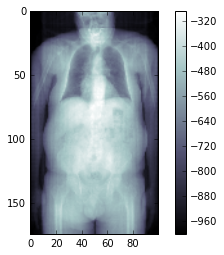

In [113]:
c_ax = plt.imshow(np.mean(ct_image, 1)[::-1], cmap='bone')
plt.colorbar(c_ax)

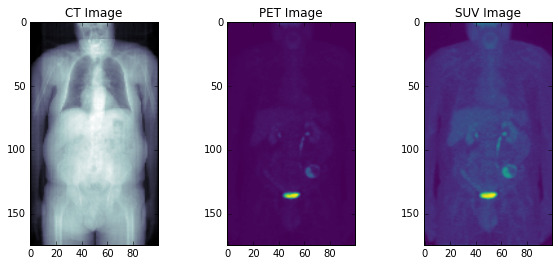

In [114]:
# calculate the mean pixel value over all slices
# [::-1] flips the axis
ct_proj = np.mean(ct_image, 1)[::-1]
pet_proj = np.max(pet_image, 1)[::-1]

# sqrt is done because without the image shows less 
# information
suv_max = np.sqrt(np.max(pet_image, 1)[::-1])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 4))
ax1.imshow(ct_proj, cmap='bone')
ax1.set_title('CT Image')
ax2.imshow(pet_proj, cmap='viridis')
ax2.set_title('PET Image')
ax3.imshow(suv_max, cmap='viridis')
ax3.set_title('SUV Image')

Now use superpixel on both images

In [52]:
## first atempt
try:
  slic(ct_proj, n_segments=100, compactness=0.01)
except ValueError as e:
    print(e)

Images of type float must be between -1 and 1.


In [53]:
# so values needs to be between -1 and 1. 
# lets see what values we have got
print(ct_proj)

[[-1000.          -998.6373291   -997.70147705 ...,  -993.33911133
   -996.61462402 -1000.        ]
 [-1000.          -997.11560059  -995.80828857 ...,  -996.42962646
   -997.15356445 -1000.        ]
 [-1000.          -999.0368042   -998.33520508 ...,  -994.47814941
   -995.40075684 -1000.        ]
 ..., 
 [-1000.          -994.60638428  -988.01806641 ...,  -995.92468262
   -997.51776123 -1000.        ]
 [-1000.          -994.42358398  -988.40655518 ...,  -996.17578125
   -997.96362305 -1000.        ]
 [-1000.          -993.87213135  -989.60736084 ...,  -995.0390625
   -994.33081055 -1000.        ]]


In [54]:
# what is the min and max value of the image
print(ct_proj.min())
print(ct_proj.max())

-1000.0
-287.434


In [62]:
# now let's normalize to values between 0 and 1
n_ct_proj = (ct_proj + 1024).clip(0, 2048) / 2048
print(n_ct_proj.min())
print(n_ct_proj.max())

0.0117188
0.359651


[[ 0  0  0 ...,  5  5  5]
 [ 0  0  0 ...,  5  5  5]
 [ 0  0  0 ...,  5  5  5]
 ..., 
 [67 67 67 ..., 70 70 70]
 [67 67 67 ..., 70 70 70]
 [67 67 67 ..., 70 70 70]]


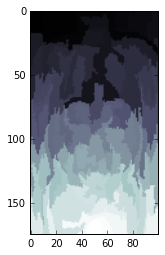

In [72]:
# now let's run the superpixel algorithm
segments = slic(n_ct_proj, n_segments=100, compactness=0.01)

# it returns a integer mask indicating the segment labels
plt.imshow(segments, cmap='bone')
print(segments)

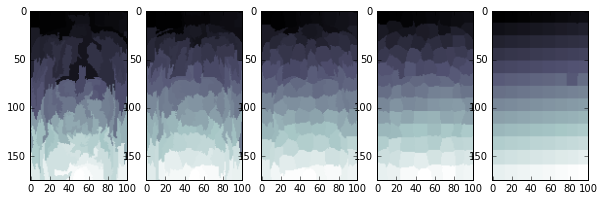

In [71]:
# now let's see different variation on the slic n_segments input parameter
segments_1 = slic(n_ct_proj, n_segments=100, compactness=0.01)
segments_2 = slic(n_ct_proj, n_segments=100, compactness=0.02)
segments_3 = slic(n_ct_proj, n_segments=100, compactness=0.05)
segments_4 = slic(n_ct_proj, n_segments=100, compactness=0.1)
segments_5 = slic(n_ct_proj, n_segments=100, compactness=0.5)
s = [segments_1, segments_2, segments_3, segments_4, segments_5]

fig, axes = plt.subplots(1, 5, figsize = (10, 4))
for ax, fig in zip(axes, s):
  ax.imshow(fig, cmap='bone')